In [1]:
import pickle  as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jobs_cleaned = pd.read_pickle('jobs_cleaned')

# **Distribution of Average Salary**

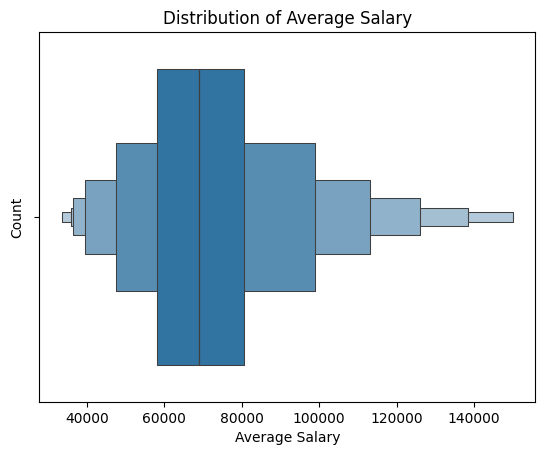

In [3]:
sns.boxenplot(data=jobs_cleaned, x='avg_salary')
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.title('Distribution of Average Salary')
plt.show()

# **Top 10 Data Analyst Jobs**

In [4]:
top_jobs = jobs_cleaned['Job Title'].value_counts().head(10)

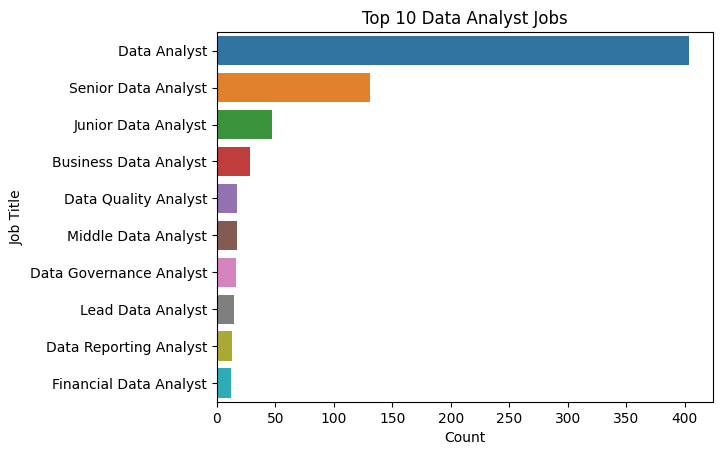

In [5]:
sns.barplot( y=top_jobs.index, x= top_jobs.values, hue=top_jobs.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Data Analyst Jobs')
plt.show()

# **Average Salary by Job Title**

In [6]:
jobs_cleaned_sorted = jobs_cleaned.sort_values(by='avg_salary', ascending=False)

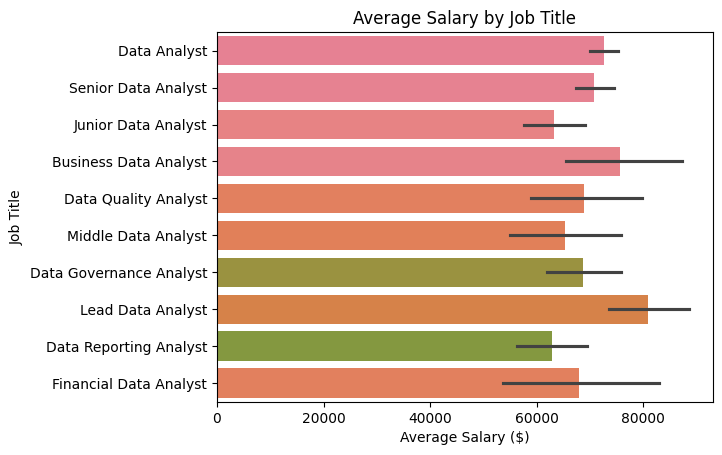

In [7]:
sns.barplot(data=jobs_cleaned_sorted, y='Job Title', x='avg_salary', order=jobs_cleaned_sorted['Job Title'].value_counts().head(10).index, hue='Job Title',orient='h')
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

# **Top 10 Locations**

In [8]:
job_location = jobs_cleaned.groupby('Location')['avg_salary'].mean().reset_index()
top_10_location = job_location.sort_values(by='avg_salary', ascending=False).head(10)

In [9]:
top_10_location

,Location,avg_salary
155,"Newark, CA",150000.000000
138,"Marin City, CA",126000.000000
56,"Daly City, CA",126000.000000
134,"Los Gatos, CA",122666.666667
178,"Pico Rivera, CA",122500.000000
246,"Whittier, CA",122500.000000
19,"Berkeley, CA",115500.000000
163,"Northfield, IL",113000.000000
141,"Maywood, IL",113000.000000
92,"Glenview, IL",113000.000000


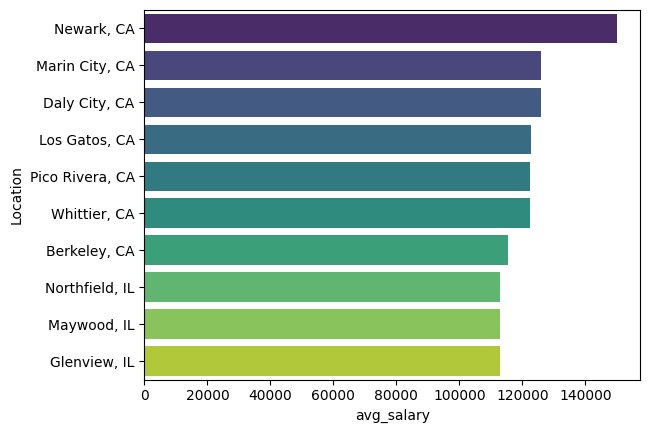

In [10]:
sns.barplot(data=top_10_location, x='avg_salary', y='Location',  palette = 'viridis', hue = 'Location')
plt.show()

# **Top 10 locations for jobs**

In [11]:
top_10_jobs_location = jobs_cleaned['Location'].value_counts().head(10)

C:\Users\pc\AppData\Local\Temp\ipykernel_23460\975025819.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_jobs_location.values, y=top_10_jobs_location.index, palette='Set2')


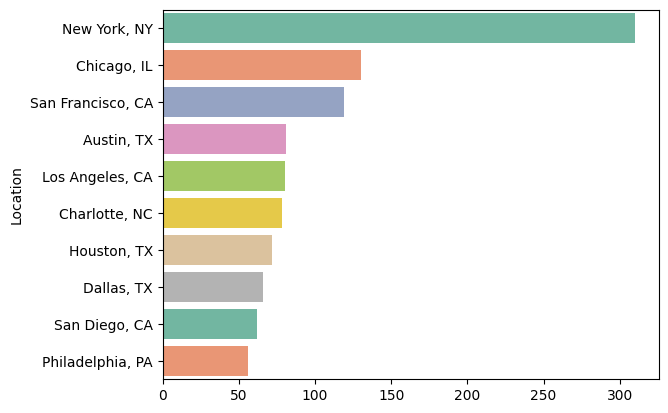

In [12]:
sns.barplot(x=top_10_jobs_location.values, y=top_10_jobs_location.index, palette='Set2')
plt.show()

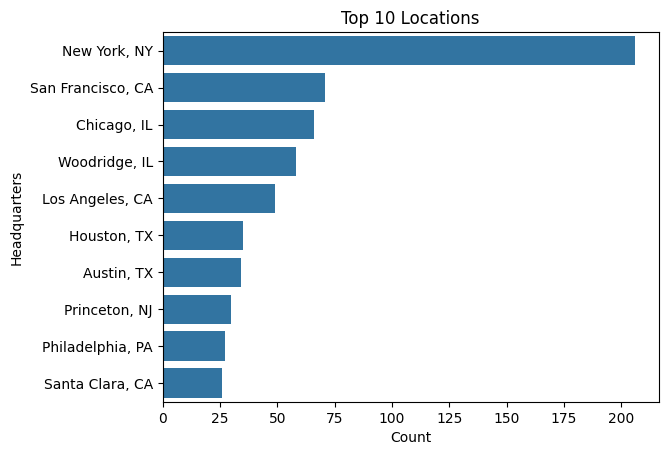

In [13]:
top_headquarters =jobs_cleaned['Headquarters'].value_counts().head(10)
sns.barplot(x=top_headquarters.values, y=top_headquarters.index)
plt.xlabel('Count')
plt.ylabel('Headquarters')
plt.title('Top 10 Locations')
plt.show()

In [14]:
jobs_cleaned.columns

Index(['S.no.', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

# **Jobs by the size of the company**

<Axes: ylabel='Size'>

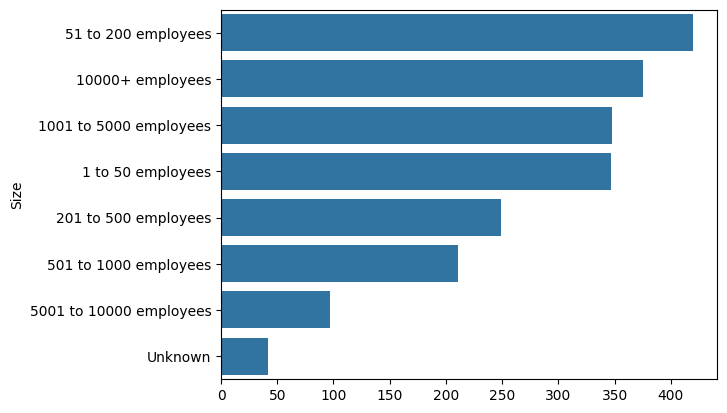

In [15]:
sns.barplot( y=jobs_cleaned['Size'].value_counts().index, x=jobs_cleaned['Size'].value_counts().values)

In [16]:
avg_salary_by_size = jobs_cleaned.groupby('Size')['avg_salary'].mean().sort_values(ascending=False).reset_index()

In [17]:
avg_salary_by_size

,Size,avg_salary
0,5001 to 10000 employees,74201.030928
1,1001 to 5000 employees,72869.252874
2,1 to 50 employees,72711.815562
3,Unknown,72595.238095
4,51 to 200 employees,72521.428571
5,501 to 1000 employees,71988.151659
6,201 to 500 employees,71192.771084
7,10000+ employees,69957.333333


C:\Users\pc\AppData\Local\Temp\ipykernel_23460\698562132.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=avg_salary_by_size, y='Size', x='avg_salary', palette='viridis')


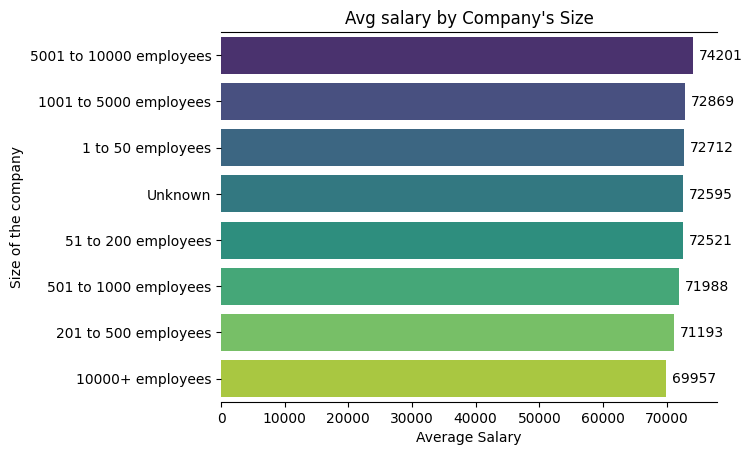

In [18]:
plot = sns.barplot(data=avg_salary_by_size, y='Size', x='avg_salary', palette='viridis')
for patch in plot.patches:
    plt.text(patch.get_width()+900, patch.get_y()+0.5, round(patch.get_width()))

plot.spines[['right','left']].set_visible(False)
plt.xlabel('Average Salary')
plt.ylabel('Size of the company')
plt.title("Avg salary by Company's Size")
plt.show()

# jobs by rating distribution

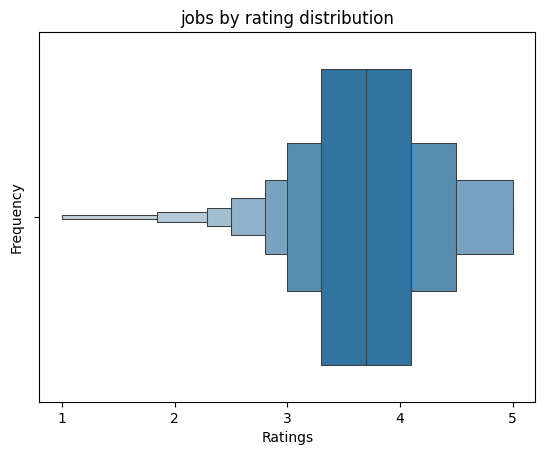

In [19]:
sns.boxenplot(x=jobs_cleaned['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.title('jobs by rating distribution')
plt.show()

# **Jobs by Types of Ownership**

In [20]:
jobs_by_ownership =jobs_cleaned['Type of ownership'].value_counts()

<Axes: ylabel='Type of ownership'>

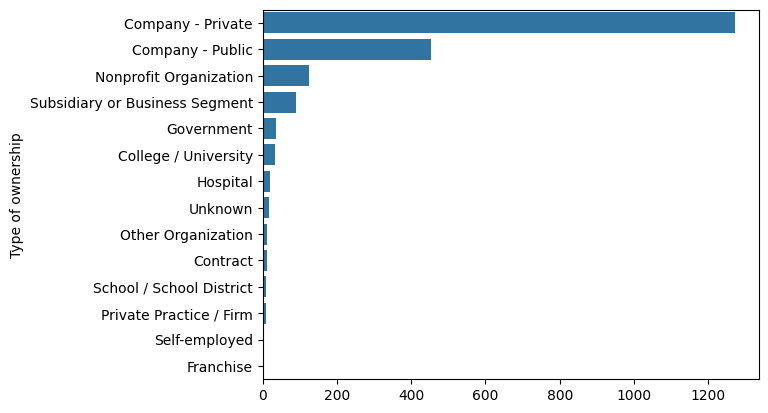

In [21]:
sns.barplot(y=jobs_by_ownership.index, x=jobs_by_ownership.values)

In [22]:
jobs_cleaned.columns

Index(['S.no.', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

In [23]:
jobs_cleaned['Sector'].value_counts().head(15)

Sector
Information Technology        570
Business Services             523
Finance                       169
Health Care                   151
Education                      52
Insurance                      51
Accounting & Legal             43
Media                          42
Manufacturing                  40
Retail                         38
Government                     36
Biotech & Pharmaceuticals      33
Non-Profit                     26
Aerospace & Defense            22
Transportation & Logistics     20
Name: count, dtype: int64

In [34]:
avg_salary_by_sector = jobs_cleaned.groupby('Sector')['avg_salary'].mean().reset_index().sort_values(by='avg_salary', ascending=False)

In [35]:
avg_salary_by_sector

,Sector,avg_salary
3,Biotech & Pharmaceuticals,83106.060606
18,Real Estate,80916.666667
2,"Arts, Entertainment & Recreation",80642.857143
0,Accounting & Legal,75220.930233
11,Information Technology,74247.368421
10,Health Care,72807.947020
4,Business Services,72273.422562
13,Manufacturing,72075.000000
6,Consumer Services,71500.000000
5,"Construction, Repair & Maintenance",70968.750000


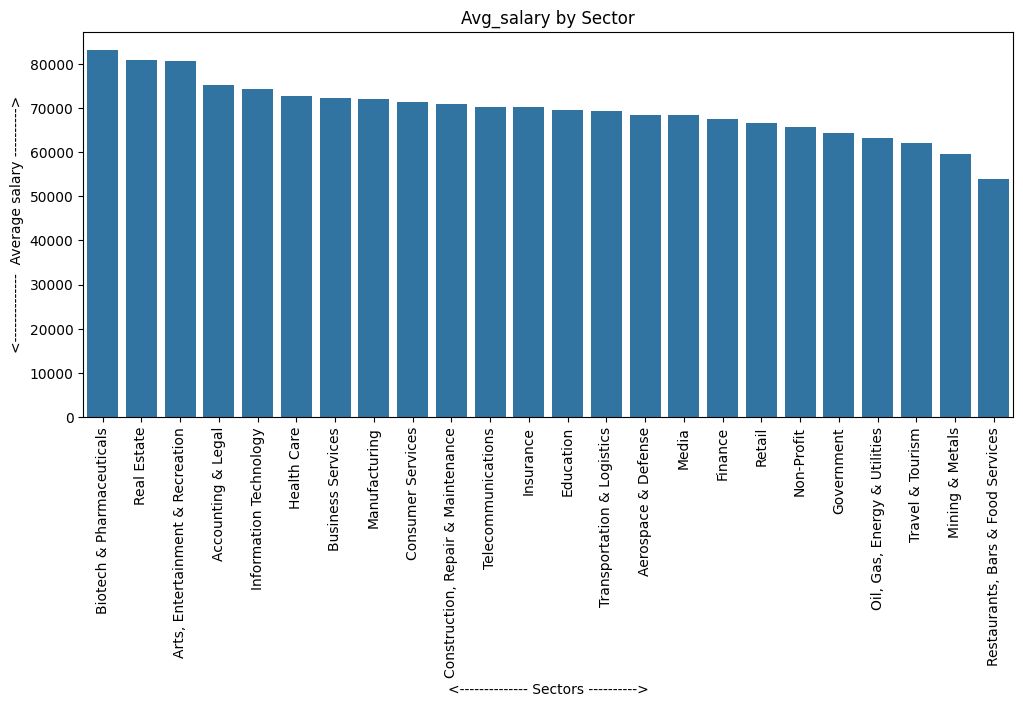

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(data=avg_salary_by_sector, x='Sector', y='avg_salary')
plt.xticks(rotation=90)
plt.title('Avg_salary by Sector')
plt.xlabel('<-------------- Sectors ---------->')
plt.ylabel('<--------------  Average salary ---------->')
plt.show()
